In [1]:
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from exotic_ld import StellarLimbDarkening

#https://exotic-ld.readthedocs.io/en/latest/

In [2]:
#  Stellar Properties
# Star Name	WASP-17
# Binary Flag	✗
# Mass of Star[msun]	1.190 ± 0.03
# Radius of Star[rsun]	1.200 +0.081/-0.08
# [Fe/H]	-0.250 ± 0.09
# Teff[k]	6550 ± 100
# Density of star[g/cm^3]	0.67 +0.16/-0.13
# log10(g)	4.20 ± 0.2
# Vsin(i)[km/s]	9.0 ± 1.5
# Gamma[km/s]	-49
# Path to the downloaded data.

ld_data_path = r"\Users\Student\Documents\exotic_ld_data"


# Stellar models grid.
ld_model = 'mps1'

# Metallicty [dex].
M_H = -0.250

# Effective temperature [K].
Teff = 6550

# Surface gravity [dex].
logg = 4.20

sld = StellarLimbDarkening(M_H, Teff, logg, ld_model, ld_data_path)


In [3]:
# Start and end of wavelength interval [angstroms].
wavelength_range = [6000., 10000.]

# Instrument mode.
mode = 'TESS'

u1, u2 = sld.compute_quadratic_ld_coeffs(wavelength_range, mode)

In [4]:
print(u1, u2)

0.21768792859790628 0.2836292883489928


(1221,)
(24,)
(1221, 24)


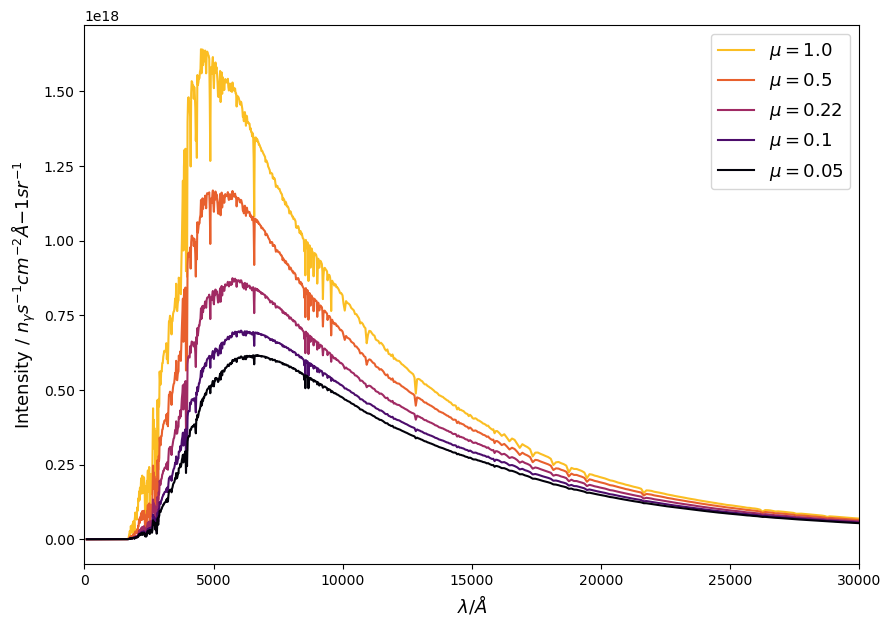

In [5]:
print(sld.stellar_wavelengths.shape)
print(sld.mus.shape)
print(sld.stellar_intensities.shape)

plt.figure(figsize=(10, 7))
for mu_idx in np.arange(0, sld.mus.shape[0], 5):
    plt.plot(sld.stellar_wavelengths, sld.stellar_intensities[:, mu_idx],
             color=cm.inferno(0.85 - mu_idx/sld.mus.shape[0]), label="$\mu={}$".format(sld.mus[mu_idx]))
plt.xlabel("$\lambda / \AA$", fontsize=13)
plt.ylabel("Intensity / $n_{\gamma} s^{-1} cm^{-2} \AA{-1} sr^{-1}$", fontsize=13)
plt.xlim(0, 3e4)
plt.legend(loc="upper right", fontsize=13)
plt.show()


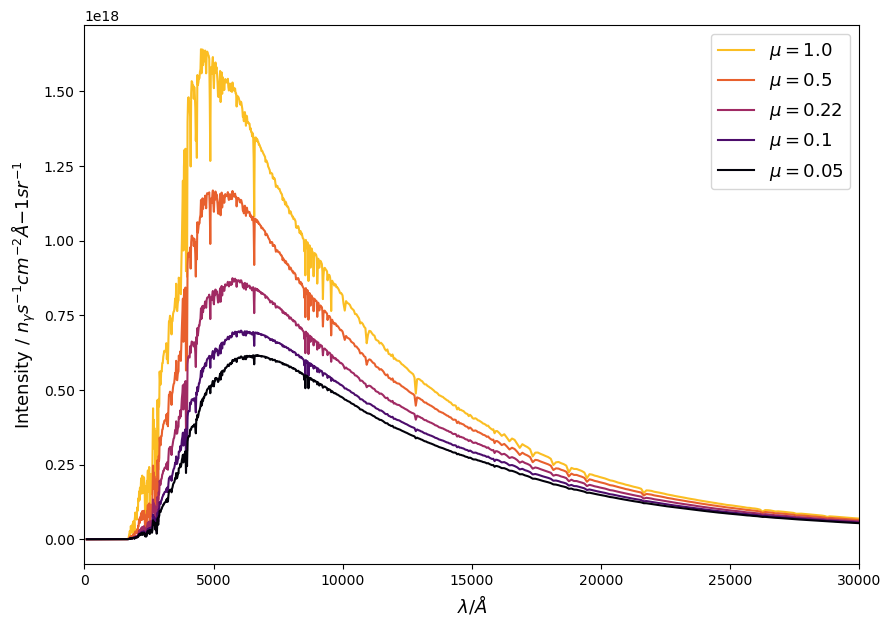

In [6]:
plt.figure(figsize=(10, 7))
for mu_idx in np.arange(0, sld.mus.shape[0], 5):
    plt.plot(sld.stellar_wavelengths, sld.stellar_intensities[:, mu_idx],
             color=cm.inferno(0.85 - mu_idx/sld.mus.shape[0]), label="$\mu={}$".format(sld.mus[mu_idx]))
plt.xlabel("$\lambda / \AA$", fontsize=13)
plt.ylabel("Intensity / $n_{\gamma} s^{-1} cm^{-2} \AA{-1} sr^{-1}$", fontsize=13)
plt.xlim(0, 3e4)
plt.legend(loc="upper right", fontsize=13)
plt.show()

In [7]:
#Get all stellar models and plot c1 and c2 probability distribution of sigmas